# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [10]:
import csv
import random
import numpy as np

In [11]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->The complete implementation of linear regression with gradient descent 

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [12]:
# implement Linear Regression
def linearRegression(alpha,n_iterations,x_train,y_train):
  # cost_ = []
  x_train = np.array(x_train)
  y_train = np.array(y_train)
  w = np.zeros(x_train.shape[1])
  m = x_train.shape[0]
  w0 = 0
  for _ in range(n_iterations):
    y_pred = np.dot(x_train, w) + w0
    residuals = y_pred - y_train
    gradient_vector = np.dot(x_train.T, residuals)
    w -= (alpha / m) * (gradient_vector)
    w0 -= (alpha / m) *(np.sum(residuals))
   
  return w,w0

w,w0 = linearRegression(0.01,30000,x_train,y_train)
y_pred = np.dot(x_test,w) + w0
residuals = y_pred - y_test
m = len(x_test)
cost = np.sum((residuals**2))/(2*m)
print(np.sqrt(cost))

0.051111291413803356


2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

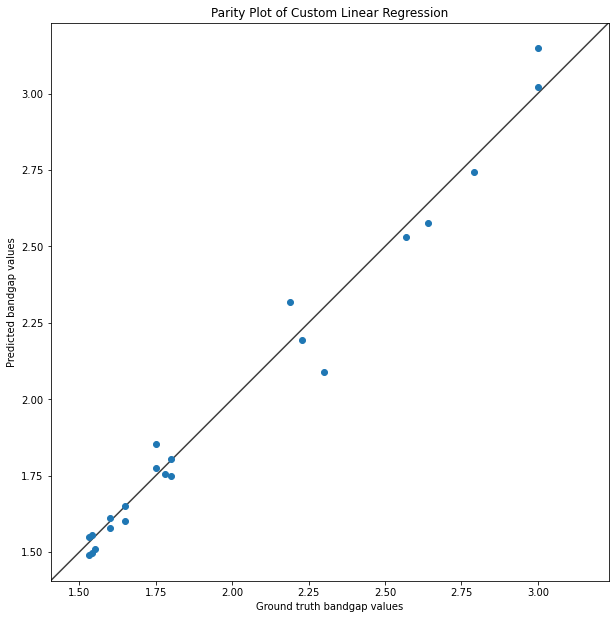

In [13]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 --> ridge regression performs Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)


2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

Objective = RSS + α * (sum of square of coefficients)
Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
  
α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
  
0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.

In [14]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
alphas = [0.0001,0.001, 0.002, 0.01, 0.06, 0.1,0.5]
rmse = list()
for a in alphas:
  ridgeModel = Ridge(alpha=a)
  ridgeModel.fit(x_train,y_train)
  y_pred = ridgeModel.predict(x_test)
  rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))

from tabulate import tabulate

# assign data
mydata = list()
for a,rm in zip(alphas,rmse):
  mydata.append((a,rm))
# create header
head = ["alpha", "RMSE"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))


# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

+---------+-----------+
|   alpha |      RMSE |
+=========+===========+
|  0.0001 | 0.0722816 |
+---------+-----------+
|  0.001  | 0.0722781 |
+---------+-----------+
|  0.002  | 0.0722745 |
+---------+-----------+
|  0.01   | 0.0722544 |
+---------+-----------+
|  0.06   | 0.0724701 |
+---------+-----------+
|  0.1    | 0.0730362 |
+---------+-----------+
|  0.5    | 0.0905751 |
+---------+-----------+


### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

  
α = 0: Same coefficients as simple linear regression
  
α = ∞: All coefficients zero (same logic as before)
  
0 < α < ∞: coefficients between 0 and that of simple linear regression

In [15]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
import sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
alphas = [0.0001,0.001, 0.002, 0.01, 0.06, 0.1,0.5]
rmse = list()
for a in alphas:
  lassoModel = Lasso(alpha=a)
  lassoModel.fit(x_train,y_train)
  y_pred = lassoModel.predict(x_test)
  rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))

from tabulate import tabulate

# assign data
mydata = list()
for a,rm in zip(alphas,rmse):
  mydata.append((a,rm))
# create header
head = ["alpha", "RMSE"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))


+---------+-----------+
|   alpha |      RMSE |
+=========+===========+
|  0.0001 | 0.0724246 |
+---------+-----------+
|  0.001  | 0.0729727 |
+---------+-----------+
|  0.002  | 0.0735966 |
+---------+-----------+
|  0.01   | 0.0965951 |
+---------+-----------+
|  0.06   | 0.358885  |
+---------+-----------+
|  0.1    | 0.494604  |
+---------+-----------+
|  0.5    | 0.498805  |
+---------+-----------+
